In [33]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


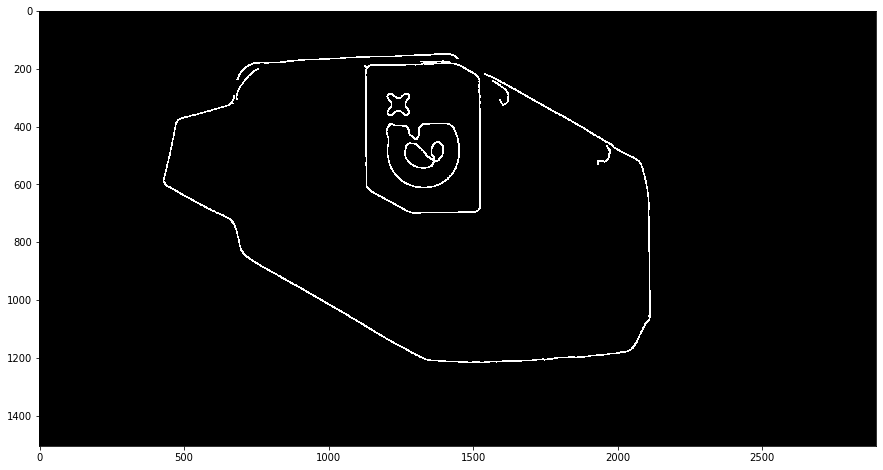

In [93]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import glob
import cv2
import matplotlib.pyplot as plt

def display(img, cmap = None):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)
    
# load the image image, convert it to grayscale, and detect edges
image = cv2.imread("sweatpatch.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
template = cv2.medianBlur(image, 31)
template = cv2.Canny(template, 10, 200)
kernel = np.ones((3, 3), np.uint8)
template = cv2.dilate(template, kernel, iterations =2)
display(template, cmap='gray')



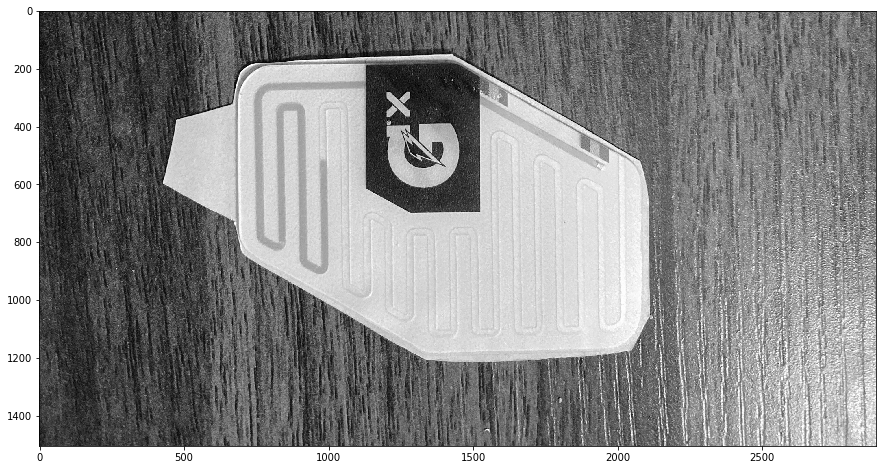

In [50]:
display(image,cmap='gray')

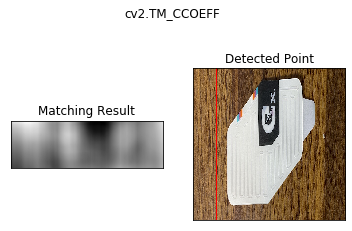

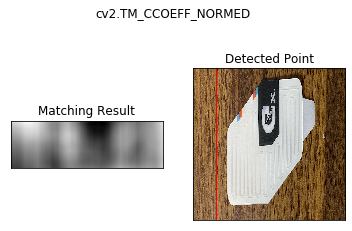

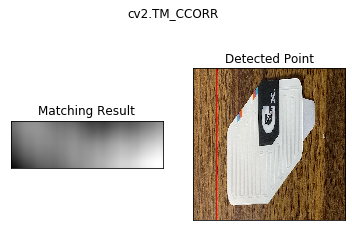

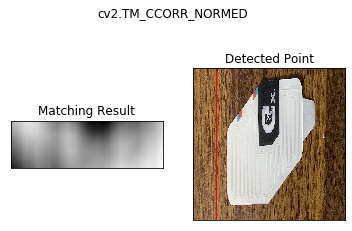

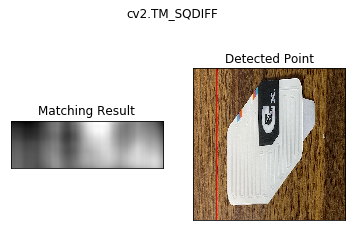

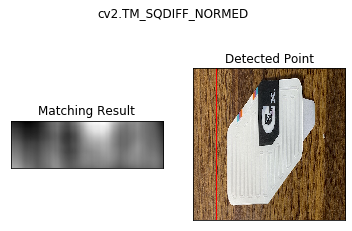

In [2]:
img = cv2.imread('image_123927839 (1).JPG',0)
img1 = cv2.imread('image_123927839 (1).JPG')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = img.copy()
template = cv2.imread('sweatpatchgray.jpg', 0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img1,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img1)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

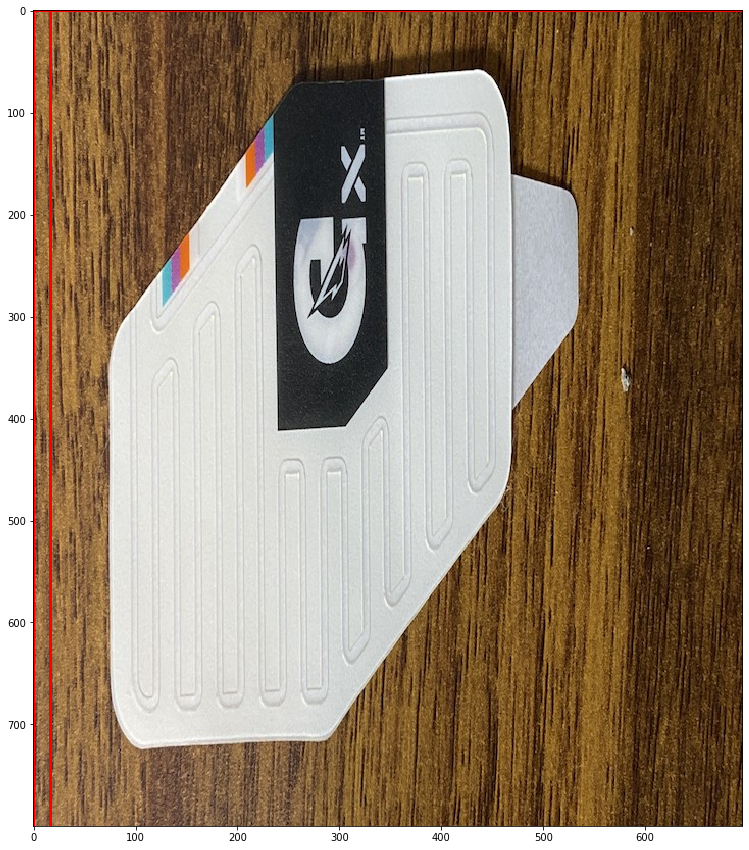

In [30]:
roi = img1[top_left[1]:top_left[1]+h, top_left[0]:top_left[0]+w]
display(roi)

In [ ]:
#Homography transformation

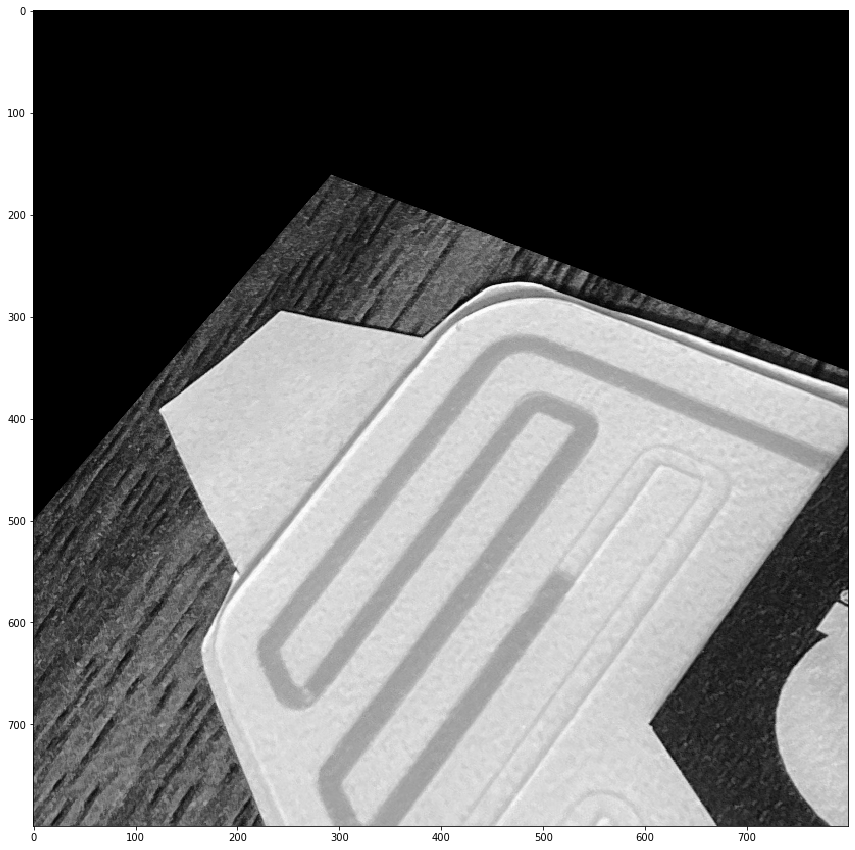

In [12]:
im_src = cv2.imread('sweatpatchgray.jpg')
pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]])
im_dst = cv2.imread('image_123927839 (1).JPG')
pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]])
h, status = cv2.findHomography(pts_src, pts_dst)
im_out = cv2.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))
cv2.imshow("Source Image", im_src)
cv2.imshow("Destination Image", im_dst)
cv2.imshow("Warped Source Image", im_out)
display(im_out)

In [96]:
contours, hierarchy = cv2.findContours(template,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
cv2.drawContours(image, contours,-1, (0, 255, 0), 3) 

array([[ 35,  37,  21, ..., 117, 118, 114],
       [ 38,  27,  18, ..., 114, 106, 114],
       [ 37,  20,  35, ..., 121, 131, 132],
       ...,
       [ 40,  35,  36, ..., 186, 193, 203],
       [ 39,  41,  44, ..., 197, 201, 204],
       [ 41,  45,  45, ..., 197, 187, 197]], dtype=uint8)

In [92]:
print("Number of Contours found = " + str(len(contours))) 

Number of Contours found = 16


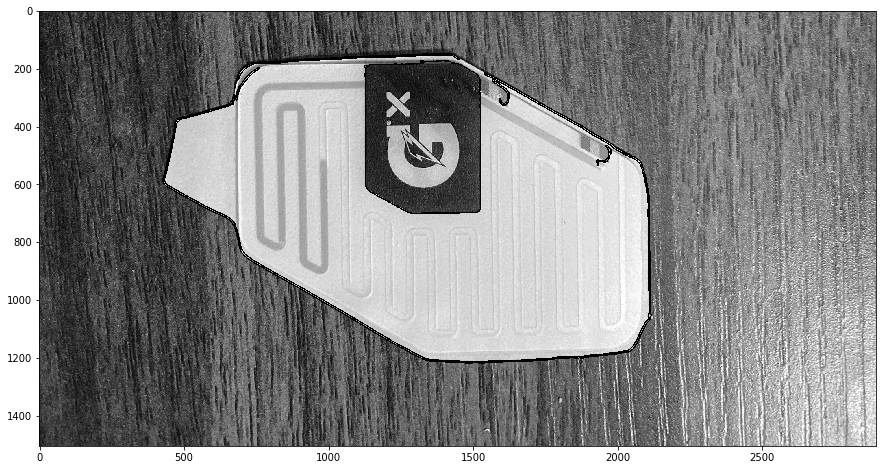

In [97]:
display(image, cmap='gray')